# EDA

In [1]:
# Your code here
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 1.  Problem statement and data collection

Description of the problem:

This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to predict, based on diagnostic measures, whether or not a patient has diabetes.

In [37]:
df = pd.read_csv("../data/raw/diabetes.csv")
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


1. Pregnancies. Number of pregnancies of the patient (numeric)
2. Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
3. BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
4. SkinThickness. Triceps skin fold thickness (measured in mm) (numeric)
5. Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
6. BMI. Body mass index (numeric)
7. DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
8. Age. Age of patient (numeric)
9. Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

## 2. Exploration and data cleaning 

### 2.1 Summarize DF

In [7]:
#Display the info
print(f'Total data Shape: {df.shape}')
print(df.info())

Total data Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [8]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

No Null values found.

### 2.2 Eliminate duplicates

In [9]:
#Check for duplicate rows
duplicates = df[df.duplicated()]
print(f'Total duplicate rows: {duplicates.shape[0]}')

Total duplicate rows: 0


In [10]:
duplicates.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [11]:
#Drop duplicate rows and keep the first occurrence
df = df.drop_duplicates()

#Confirm if duplicates are removed
print(f'Data shape after removing duplicates: {df.shape}')

Data shape after removing duplicates: (768, 9)


## 3. Univariate Analysis 

In [12]:
#Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

#Print the lists of columns
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: []
Numerical columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


### 3.2 Numerical Variable Analysis 

In [ ]:
#Display summary statistics for numerical columns
df[numerical_columns].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


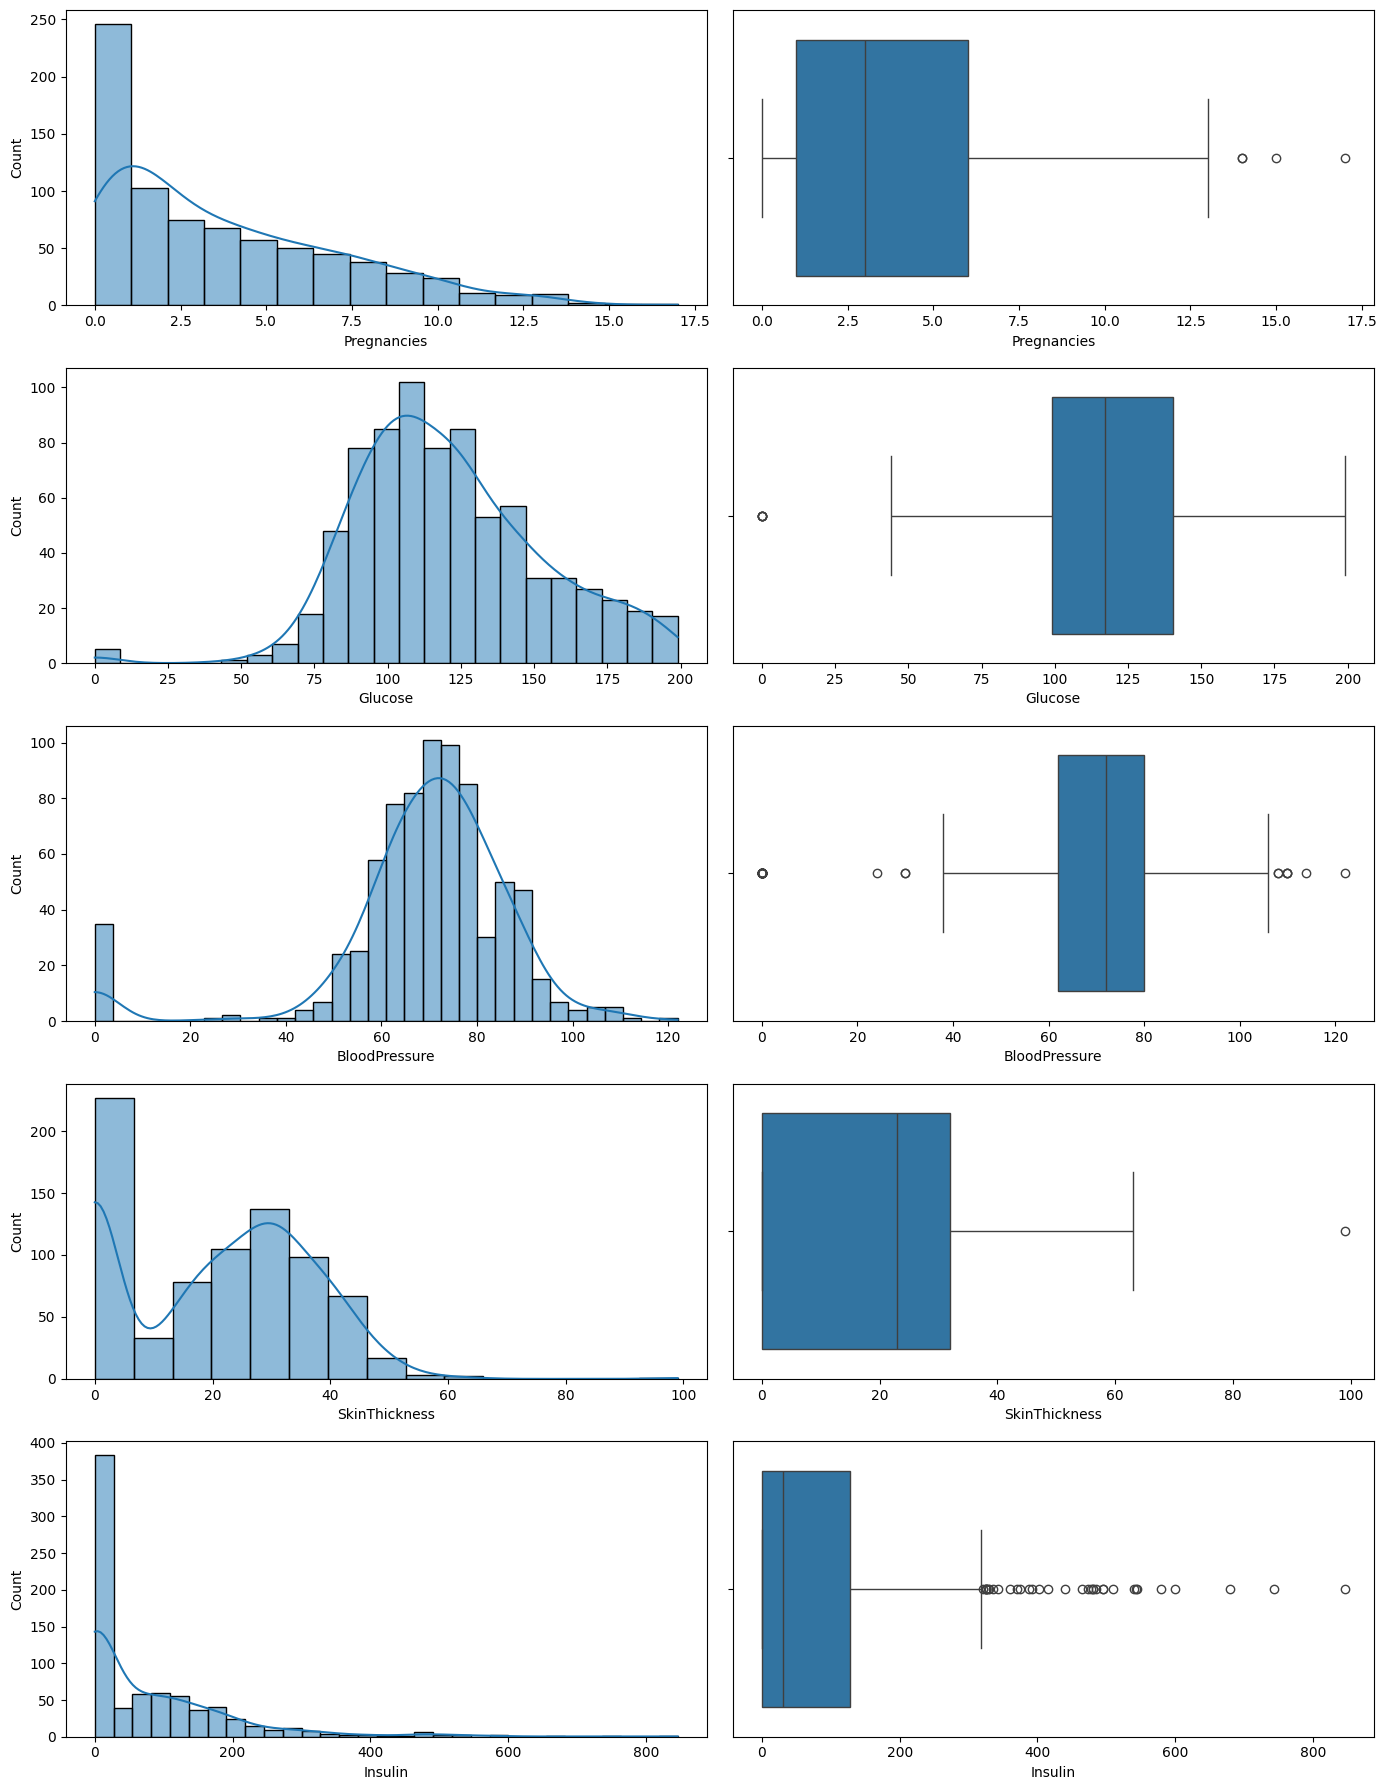

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(14, 18))

sns.histplot(data=df, x='Pregnancies', ax=ax[0, 0], kde=True)
sns.boxplot(data=df, x='Pregnancies', ax=ax[0, 1])

sns.histplot(data=df, x='Glucose', ax=ax[1, 0], kde=True)
sns.boxplot(data=df, x='Glucose', ax=ax[1, 1])

sns.histplot(data=df, x='BloodPressure', ax=ax[2, 0], kde=True)
sns.boxplot(data=df, x='BloodPressure', ax=ax[2, 1])

sns.histplot(data=df, x='SkinThickness', ax=ax[3, 0], kde=True)
sns.boxplot(data=df, x='SkinThickness', ax=ax[3, 1])

sns.histplot(data=df, x='Insulin', ax=ax[4, 0], kde=True)
sns.boxplot(data=df, x='Insulin', ax=ax[4, 1])

plt.tight_layout()
plt.show()


## 4. Multivariate Analysis 

### 4.1 Numerical - Numerical Analysis

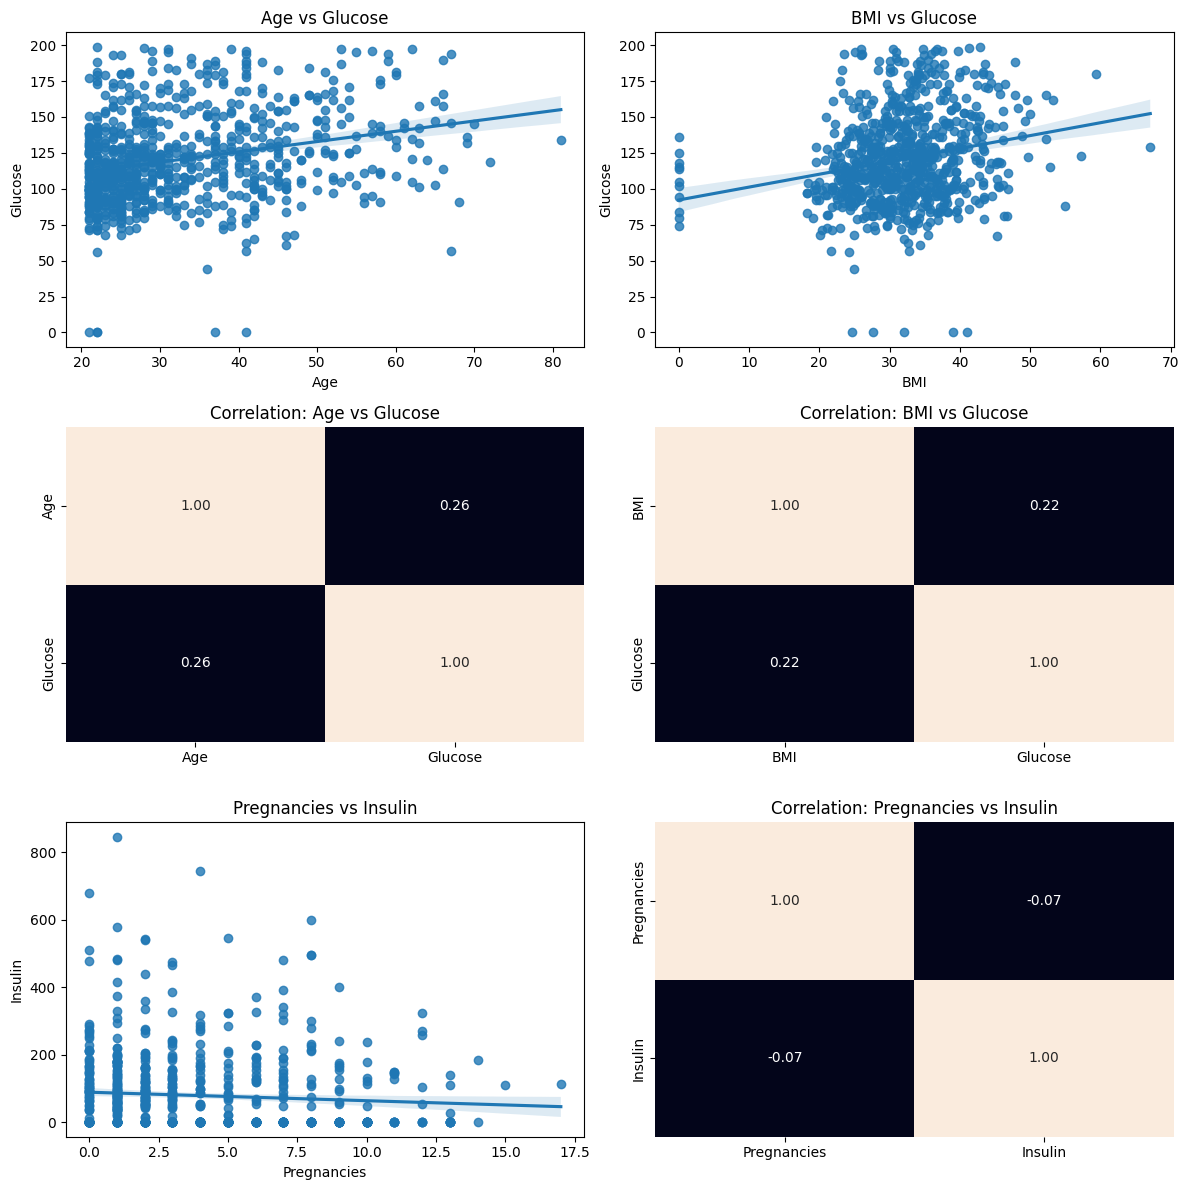

In [18]:
fig, axis = plt.subplots(3, 2, figsize=(12, 12))

#Age vs Glucose
sns.regplot(ax=axis[0, 0], data=df, x="Age", y="Glucose")
axis[0, 0].set_title("Age vs Glucose")

sns.heatmap(df[["Age", "Glucose"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
axis[1, 0].set_title("Correlation: Age vs Glucose")

#BMI vs Glucose
sns.regplot(ax=axis[0, 1], data=df, x="BMI", y="Glucose")
axis[0, 1].set_title("BMI vs Glucose")

sns.heatmap(df[["BMI", "Glucose"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
axis[1, 1].set_title("Correlation: BMI vs Glucose")

#Pregnancies vs Insulin
sns.regplot(ax=axis[2, 0], data=df, x="Pregnancies", y="Insulin")
axis[2, 0].set_title("Pregnancies vs Insulin")

sns.heatmap(df[["Pregnancies", "Insulin"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)
axis[2, 1].set_title("Correlation: Pregnancies vs Insulin")

plt.tight_layout()
plt.show()

Age vs Glucose:
Slight positive trend, older people tend to have slightly higher glucose.
Weak correlation (0.26), suggesting only a minor relationship.

BMI vs Glucose:
Mild positive trend, higher BMI is somewhat linked to higher glucose.
Weak correlation (0.22), indicating a small relationship.

Pregnancies vs Insulin:
No clear trend between pregnancies and insulin.
Very low correlation (-0.07), showing no meaningful relationship.

### 4.3 Other mixed analysis


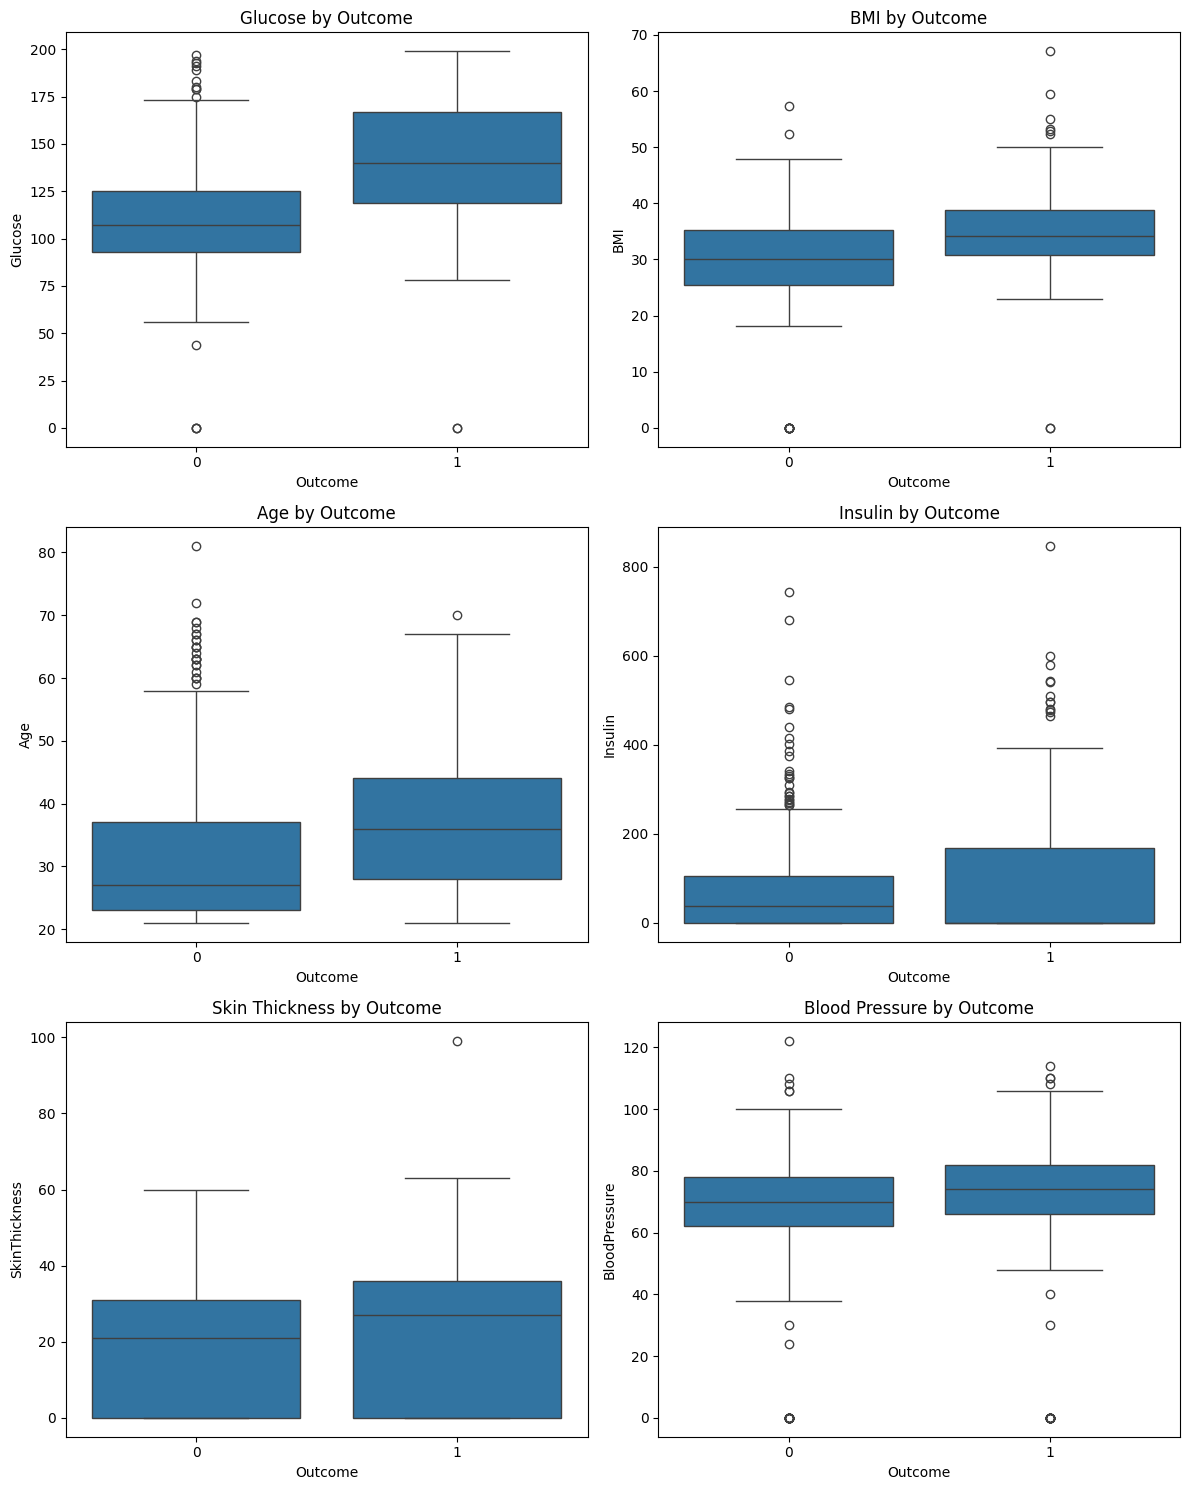

In [ ]:
#Distribution of outcomes with numerical variables
fig, ax = plt.subplots(3, 2, figsize=(12, 15))

sns.boxplot(data=df, x="Outcome", y="Glucose", ax=ax[0, 0])
ax[0, 0].set_title("Glucose by Outcome")

sns.boxplot(data=df, x="Outcome", y="BMI", ax=ax[0, 1])
ax[0, 1].set_title("BMI by Outcome")

sns.boxplot(data=df, x="Outcome", y="Age", ax=ax[1, 0])
ax[1, 0].set_title("Age by Outcome")

sns.boxplot(data=df, x="Outcome", y="Insulin", ax=ax[1, 1])
ax[1, 1].set_title("Insulin by Outcome")

sns.boxplot(data=df, x="Outcome", y="SkinThickness", ax=ax[2, 0])
ax[2, 0].set_title("Skin Thickness by Outcome")

sns.boxplot(data=df, x="Outcome", y="BloodPressure", ax=ax[2, 1])
ax[2, 1].set_title("Blood Pressure by Outcome")

plt.tight_layout()
plt.show()


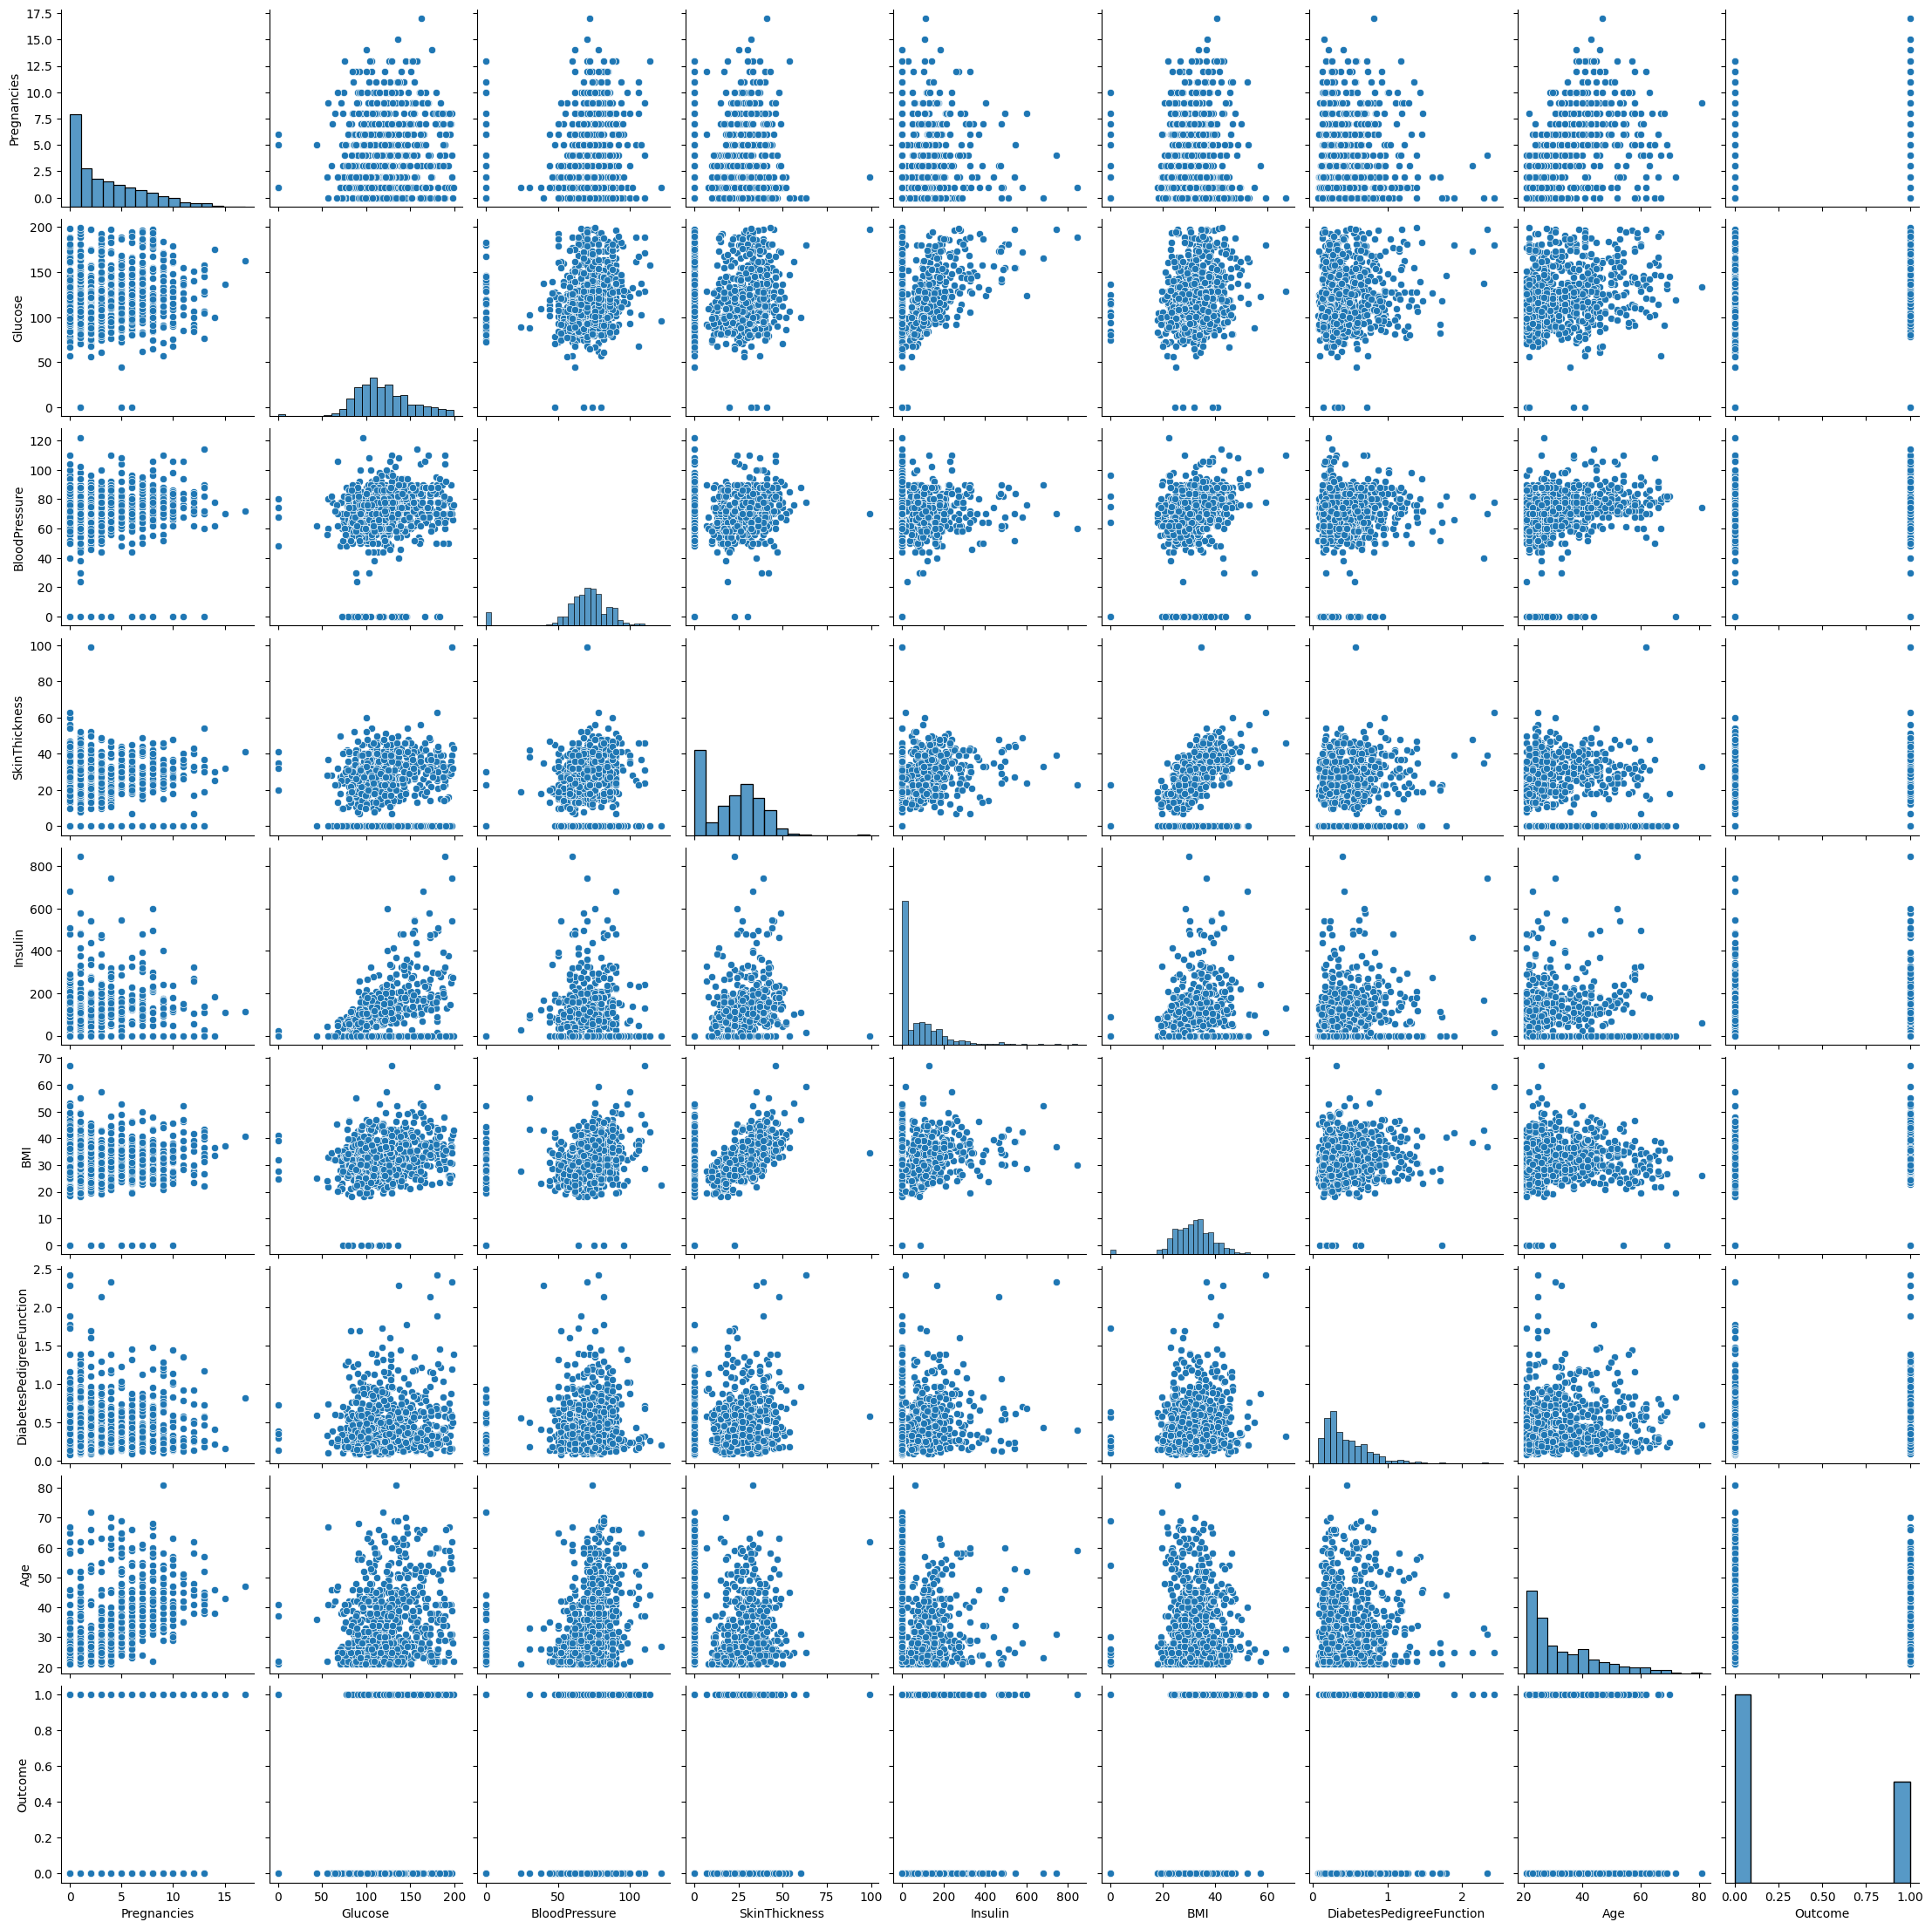

In [20]:
sns.pairplot(data=df)
plt.show()

### 4.5 Corr matrix

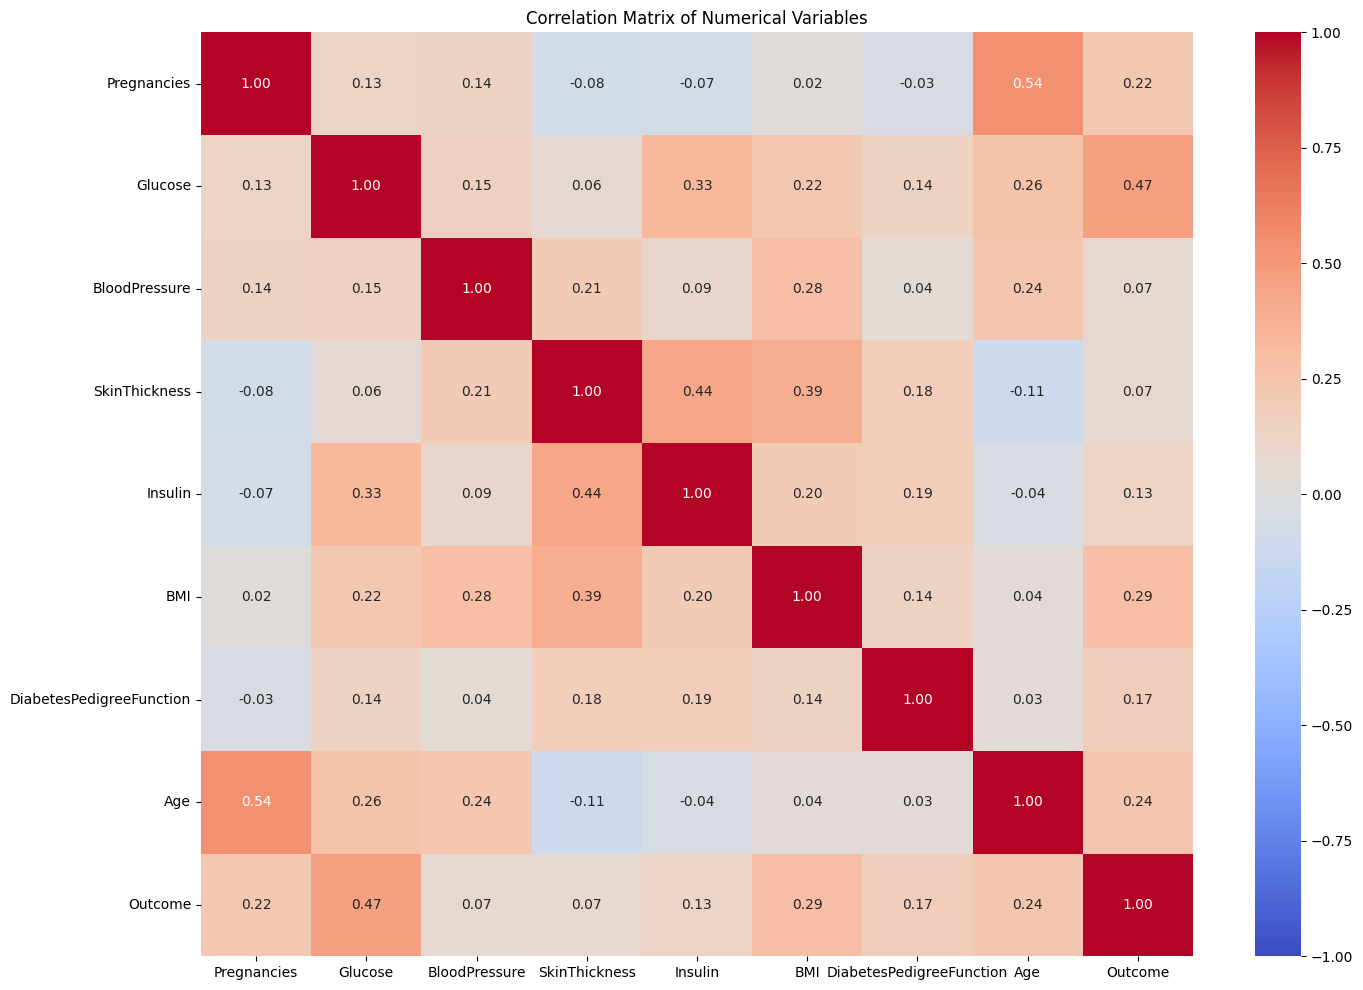

In [ ]:
#Calculate the correlation matrix for numerical columns
correlation_matrix = df.corr()

#Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 12)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

##### Key insights: 
Glucose and Outcome:
Moderate positive correlation (0.47) with Outcome, suggesting higher glucose levels are associated with diabetes.

Age and Pregnancies:
Strongest correlation (0.54), likely due to older individuals having more pregnancies.

BMI and Outcome:
Weak positive correlation (0.29) with Outcome, indicating BMI might play a role in diabetes risk.

Insulin and SkinThickness:
Moderate correlation (0.44), possibly reflecting body fat distribution.

No Strong Multicollinearity:
Most features have low-to-moderate correlations, indicating minimal redundancy among variables.

## 5. Feature Engineering 

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 5.1 Outlier Analysis

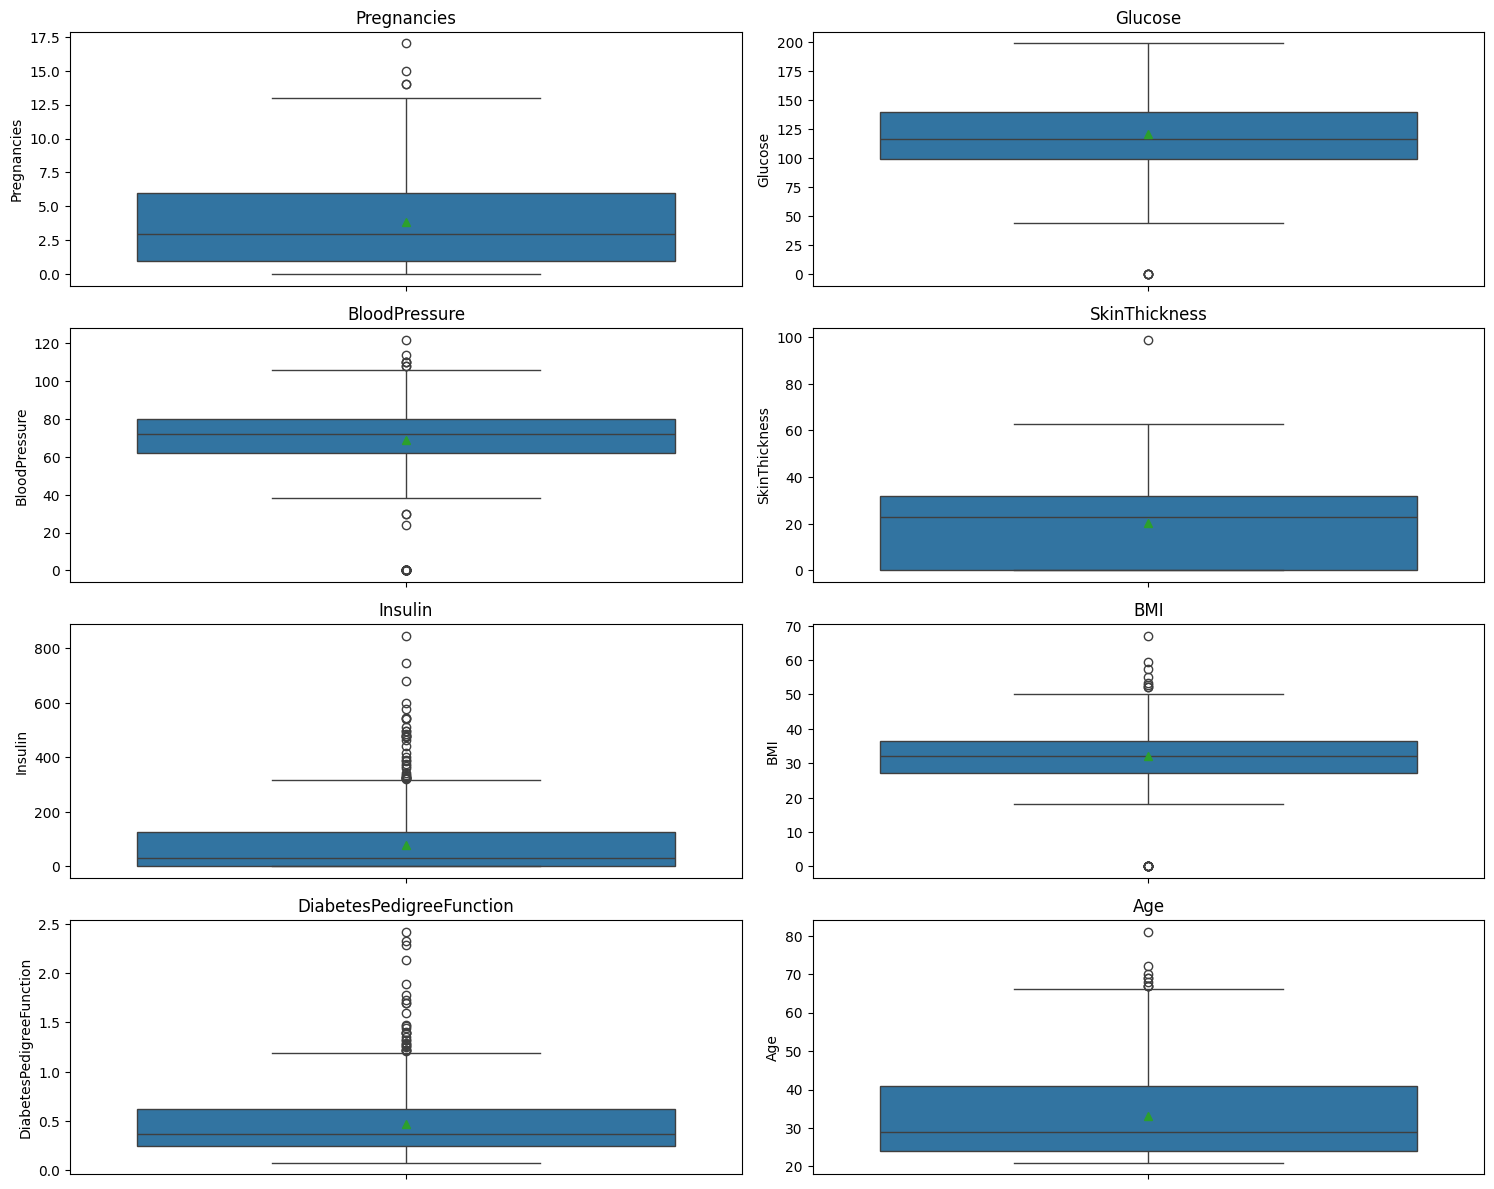

In [23]:
fig, axis = plt.subplots(4, 2, figsize=(15, 12))

sns.boxplot(ax=axis[0, 0], data=df, y="Pregnancies", showmeans=True)
axis[0, 0].set_title("Pregnancies")

sns.boxplot(ax=axis[0, 1], data=df, y="Glucose", showmeans=True)
axis[0, 1].set_title("Glucose")

sns.boxplot(ax=axis[1, 0], data=df, y="BloodPressure", showmeans=True)
axis[1, 0].set_title("BloodPressure")

sns.boxplot(ax=axis[1, 1], data=df, y="SkinThickness", showmeans=True)
axis[1, 1].set_title("SkinThickness")

sns.boxplot(ax=axis[2, 0], data=df, y="Insulin", showmeans=True)
axis[2, 0].set_title("Insulin")

sns.boxplot(ax=axis[2, 1], data=df, y="BMI", showmeans=True)
axis[2, 1].set_title("BMI")

sns.boxplot(ax=axis[3, 0], data=df, y="DiabetesPedigreeFunction", showmeans=True)
axis[3, 0].set_title("DiabetesPedigreeFunction")

sns.boxplot(ax=axis[3, 1], data=df, y="Age", showmeans=True)
axis[3, 1].set_title("Age")

plt.tight_layout()
plt.show()


In [28]:
#Creating a copy of our df to remove outliers 
df_no = df.copy()

In [ ]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'./ENC/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [ ]:
df_no['Pregnancies'] = remove_outliers(df_no['Pregnancies'], 'Pregnancies', allow_neg=False)
df_no['Glucose'] = remove_outliers(df_no['Glucose'], 'Glucose', allow_neg=False)
df_no['BloodPressure'] = remove_outliers(df_no['BloodPressure'], 'BloodPressure', allow_neg=False)
df_no['SkinThickness'] = remove_outliers(df_no['SkinThickness'], 'SkinThickness', allow_neg=False)
df_no['Insulin'] = remove_outliers(df_no['Insulin'], 'Insulin', allow_neg=False)
df_no['BMI'] = remove_outliers(df_no['BMI'], 'BMI', allow_neg=False)
df_no['DiabetesPedigreeFunction'] = remove_outliers(df_no['DiabetesPedigreeFunction'], 'DiabetesPedigreeFunction', allow_neg=True)
df_no['Age'] = remove_outliers(df_no['Age'], 'Age', allow_neg=False)


In [ ]:
print("Original Data Summary:")
print(df.describe())

print("Data without Outliers Summary:")
print(df_no.describe())

Original Data Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0

### 5.2 Missing Values

In [39]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Handling 0 values as if NaN

In [40]:
zero_counts = (df == 0).sum()
print("Count of zero values in each feature:")
print(zero_counts)

Count of zero values in each feature:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [41]:
#Replace zero values with NaN in selected columns
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [42]:
#Verify that zeros were replaced with NaN
print("Missing values after replacing zeros with NaN:")
print(df.isna().sum())

Missing values after replacing zeros with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [43]:
#Fill missing values with the median of each column
df.fillna(df.median(), inplace=True)

In [ ]:
print("Missing values after imputation:")
print(df.isna().sum())

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### 5.3 Split train/test of both Data Frames

In [45]:
def split(target, df, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [46]:
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('Outcome', df)
X_train_without_outliers, X_test_without_outliers, _, _ = split('Outcome', df_no)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

### 5.4 Normalization

In [52]:
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)
 
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'../src/ENC/normalized_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [53]:
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

### 5.5 Min-Max Scaling

In [ ]:
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)

    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index=X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index=X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'../src/ENC/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [55]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

## 6. Feature Selection 

In [56]:
def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()
    
    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])
    
    dump(selection_model, open(f'./ENC/selection_model_{reference}.sav', 'wb'))
    
    return X_train_sel, X_test_sel

In [57]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 5, 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 5, 'without_outliers')

### 6.1 Applying the filter to the normalized and minmax scaled data frames

In [58]:
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

### 6.2 Saving the CSV files

In [60]:
dfs_train = [X_train_with_outliers_sel, X_train_without_outliers_sel, 
             X_train_with_outliers_norm_sel, X_train_without_outliers_norm_sel, 
             X_train_with_outliers_minmax_sel, X_train_without_outliers_minmax_sel]

dfs_test = [X_test_with_outliers_sel, X_test_without_outliers_sel, 
            X_test_with_outliers_norm_sel, X_test_without_outliers_norm_sel, 
            X_test_with_outliers_minmax_sel, X_test_without_outliers_minmax_sel]

In [ ]:
#Train data frames
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)

#Test data frames
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)

# Building a Desicion Tree Model

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from pickle import dump
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
#model with Gini impurity
model_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
model_gini.fit(X_train_with_outliers, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#model with entropy (information gain)
model_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
model_entropy.fit(X_train_with_outliers, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#Gini-based model
y_pred_gini = model_gini.predict(X_test_with_outliers)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy with Gini impurity: {accuracy_gini}")

#Entropy-based model
y_pred_entropy = model_entropy.predict(X_test_with_outliers)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy with Entropy: {accuracy_entropy}")

Accuracy with Gini impurity: 0.7597402597402597
Accuracy with Entropy: 0.7337662337662337


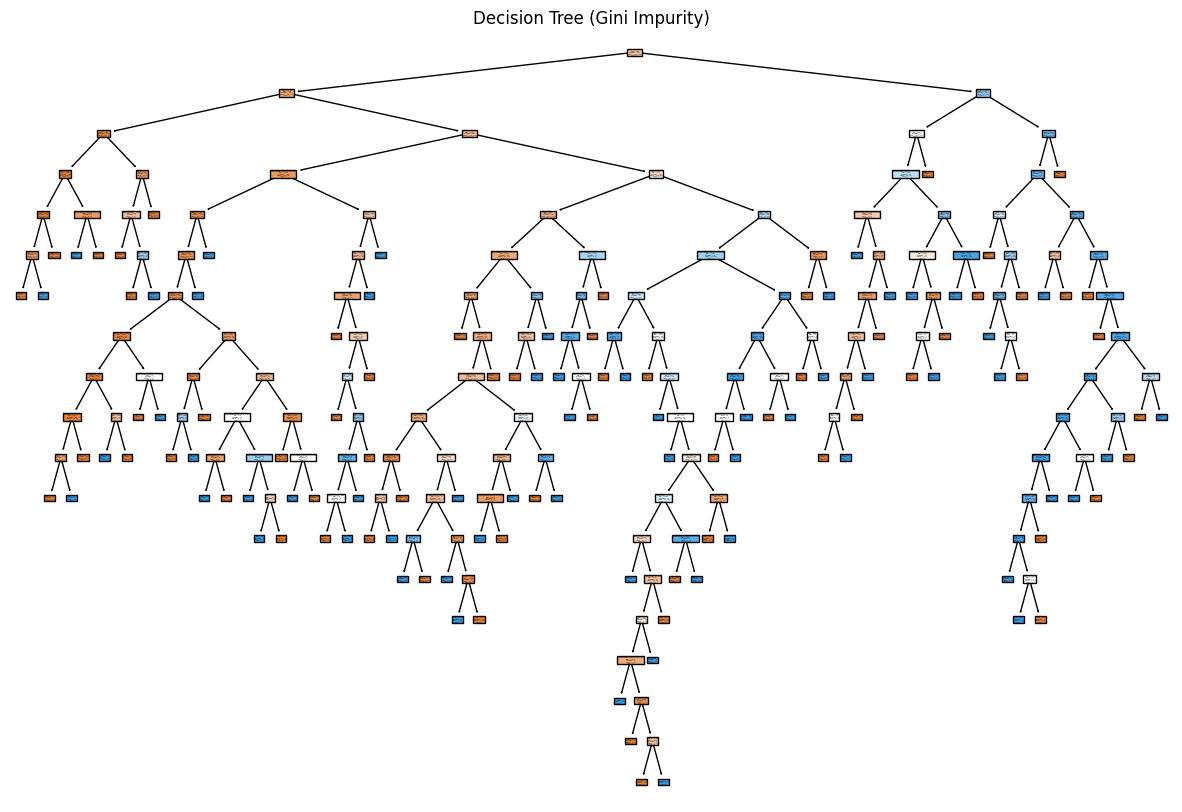

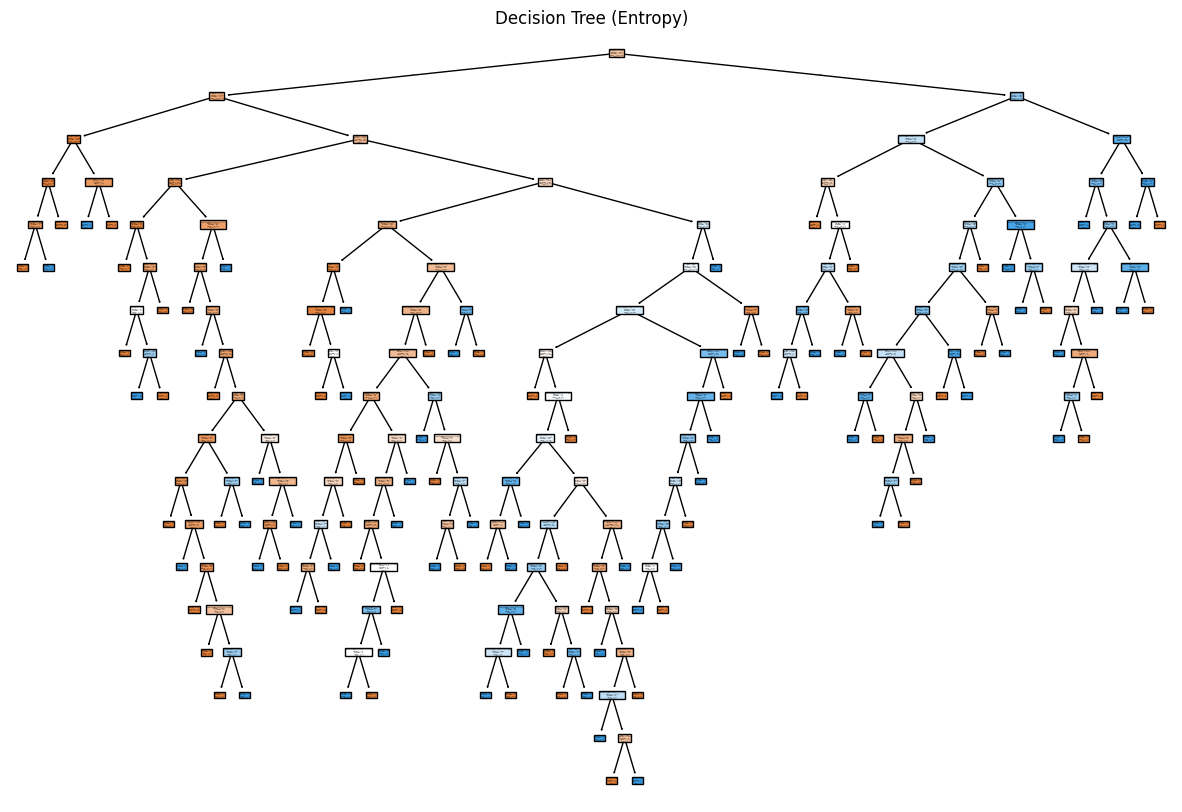

In [66]:
#Gini-based tree
plt.figure(figsize=(15, 10))
tree.plot_tree(model_gini, feature_names=X_train_with_outliers.columns, class_names=["0", "1"], filled=True)
plt.title("Decision Tree (Gini Impurity)")
plt.show()

#Entropy-based tree
plt.figure(figsize=(15, 10))
tree.plot_tree(model_entropy, feature_names=X_train_with_outliers.columns, class_names=["0", "1"], filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()

# Optimize the Model

In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)

#hyperparameter grid
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

#5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)

#grid search to the training data
grid_search.fit(X_train_with_outliers, y_train)

#best model from grid search
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)


Best parameters found:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validated accuracy: 0.7378


In [ ]:
from pickle import dump

dump(best_model, open("../src/ENC/optimized_decision_tree_model.sav", "wb"))
print("Best model saved successfully.")

Best model saved successfully.
